In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
df = pd.read_csv("C:/Users/madhu/Downloads/Sentiment Analysis/Amazon-Product-Reviews - Amazon Product Review.csv")

In [3]:
df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,sentiment
0,US,11555559,R1QXC7AHHJBQ3O,B00IKPX4GY,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Five Stars,Great love it,2015-08-31,1
1,US,31469372,R175VSRV6ZETOP,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,3,0,0,N,N,Lots of ads Slow processing speed Occasionally...,Lots of ads<br />Slow processing speed<br />Oc...,2015-08-31,0
2,US,26843895,R2HRFF78MWGY19,B00IKPW0UA,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Well thought out device,Excellent unit. The versatility of this table...,2015-08-31,1
3,US,19844868,R8Q39WPKYVSTX,B00LCHSHMS,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,4,0,0,N,N,Not all apps/games we were looking forward to ...,I bought this on Amazon Prime so I ended up bu...,2015-08-31,1
4,US,1189852,R3RL4C8YP2ZCJL,B00IKPZ5V6,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Five Stars,All Amazon products continue to meet my expect...,2015-08-31,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30846 entries, 0 to 30845
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   marketplace        30846 non-null  object
 1   customer_id        30846 non-null  int64 
 2   review_id          30846 non-null  object
 3   product_id         30846 non-null  object
 4   product_parent     30846 non-null  int64 
 5   product_title      30846 non-null  object
 6   product_category   30846 non-null  object
 7   star_rating        30846 non-null  int64 
 8   helpful_votes      30846 non-null  int64 
 9   total_votes        30846 non-null  int64 
 10  vine               30846 non-null  object
 11  verified_purchase  30846 non-null  object
 12  review_headline    30846 non-null  object
 13  review_body        30846 non-null  object
 14  review_date        30846 non-null  object
 15  sentiment          30846 non-null  int64 
dtypes: int64(6), object(10)
memory usage: 3.

In [5]:
df.isna().sum()

marketplace          0
customer_id          0
review_id            0
product_id           0
product_parent       0
product_title        0
product_category     0
star_rating          0
helpful_votes        0
total_votes          0
vine                 0
verified_purchase    0
review_headline      0
review_body          0
review_date          0
sentiment            0
dtype: int64

In [7]:
#Changing Review Date to the proper format
df['review_date'] = pd.to_datetime(df['review_date'], errors='coerce')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30846 entries, 0 to 30845
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   marketplace        30846 non-null  object        
 1   customer_id        30846 non-null  int64         
 2   review_id          30846 non-null  object        
 3   product_id         30846 non-null  object        
 4   product_parent     30846 non-null  int64         
 5   product_title      30846 non-null  object        
 6   product_category   30846 non-null  object        
 7   star_rating        30846 non-null  int64         
 8   helpful_votes      30846 non-null  int64         
 9   total_votes        30846 non-null  int64         
 10  vine               30846 non-null  object        
 11  verified_purchase  30846 non-null  object        
 12  review_headline    30846 non-null  object        
 13  review_body        30846 non-null  object        
 14  review

In [16]:
df.describe()


,customer_id,product_parent,star_rating,helpful_votes,total_votes,sentiment
count,3.084600e+04,30846.0,30846.000000,30846.00000,30846.000000,30846.000000
mean,2.471002e+07,2693241.0,4.336154,0.68641,0.895027,0.835343
std,1.611172e+07,0.0,1.120716,30.74337,32.356354,0.370876
min,1.134600e+04,2693241.0,1.000000,0.00000,0.000000,0.000000
25%,1.150637e+07,2693241.0,4.000000,0.00000,0.000000,1.000000
50%,2.294025e+07,2693241.0,5.000000,0.00000,0.000000,1.000000
75%,4.008874e+07,2693241.0,5.000000,0.00000,0.000000,1.000000
max,5.309351e+07,2693241.0,5.000000,3720.00000,3875.000000,1.000000


In [20]:
df['product_title'].value_counts()


Fire HD 7, 7" HD Display, Wi-Fi, 8 GB    30846
Name: product_title, dtype: int64

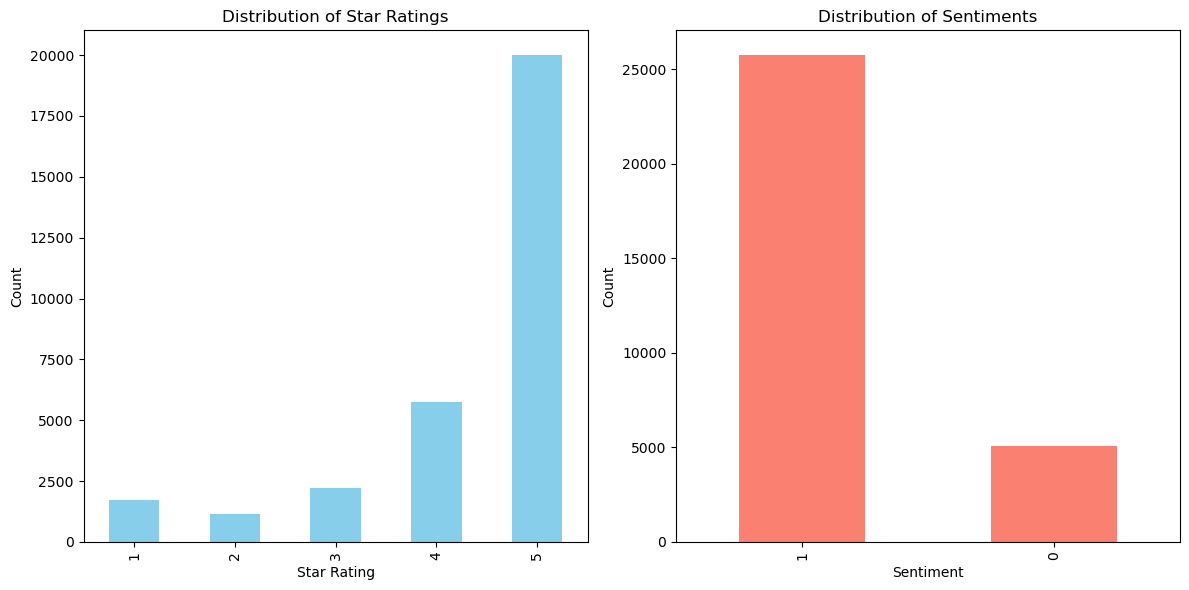

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
df['star_rating'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Star Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
df['sentiment'].value_counts().plot(kind='bar', color='salmon')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


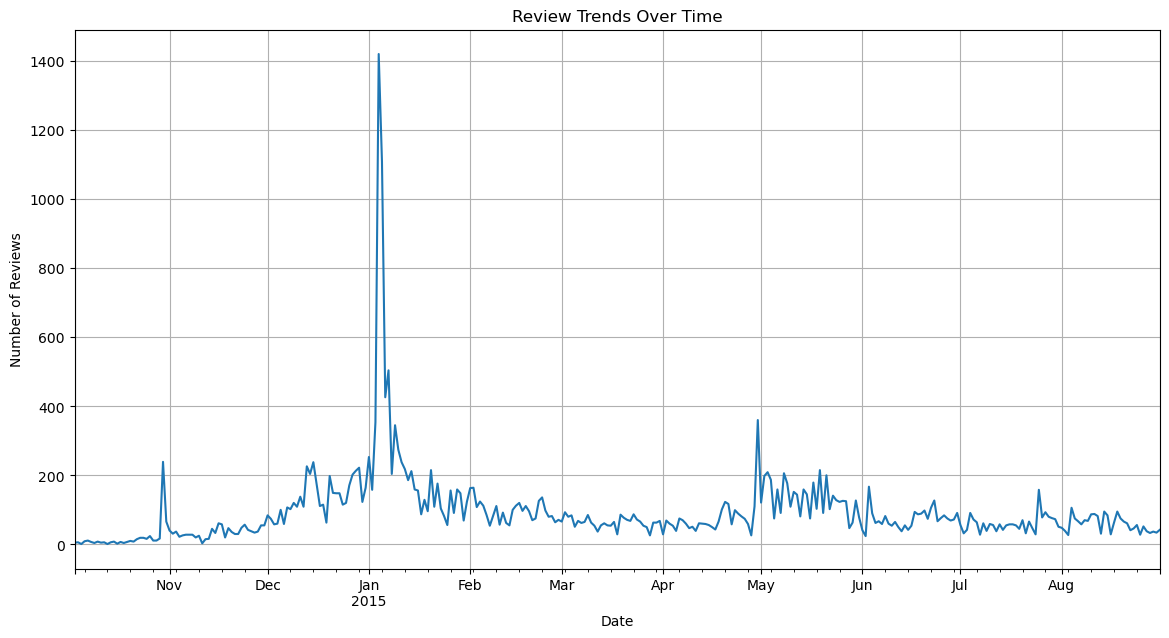

In [36]:
reviews_per_date = df.groupby('review_date').size()

plt.figure(figsize=(14, 7))
reviews_per_date.plot()
plt.title('Review Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.show()


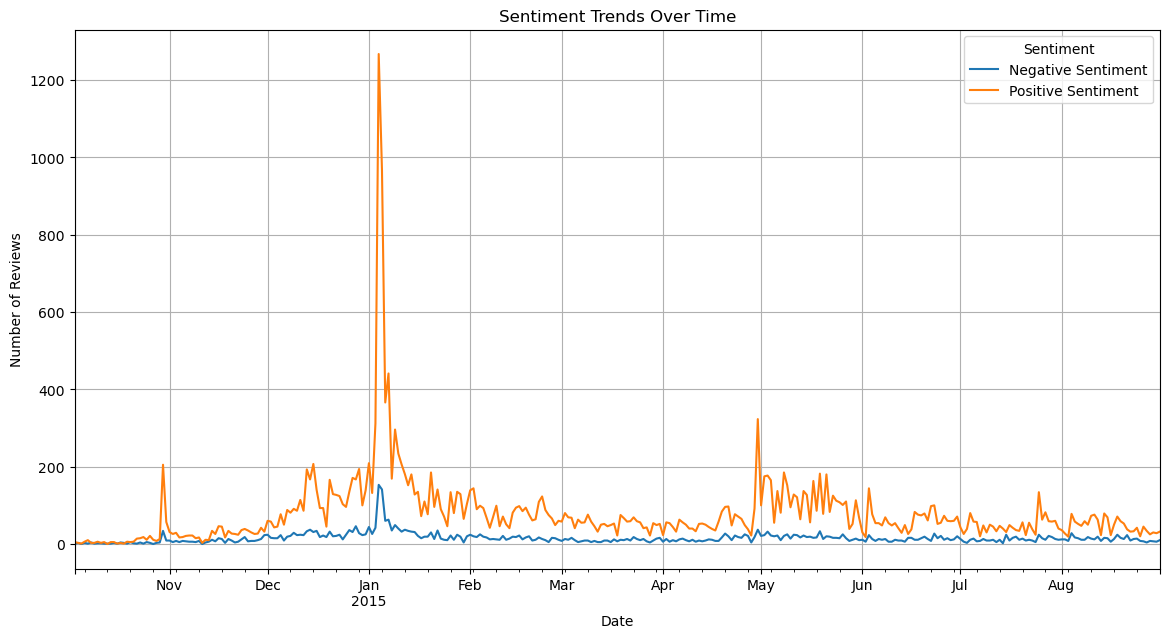

In [37]:
sentiment_trends = df.groupby(['review_date', 'sentiment']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 7))
sentiment_trends.plot(kind='line', ax=plt.gca())
plt.title('Sentiment Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.legend(['Negative Sentiment', 'Positive Sentiment'], title='Sentiment')
plt.grid(True)
plt.show()


In [25]:
def clean_text(text):
    text = re.sub(r'<br\s*/?>', ' ', text)  # Replace <br> tags with space
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabetic characters
    text = text.lower()  # Convert to lowercase
    return text

df['cleaned_review_body'] = df['review_body'].apply(clean_text)

In [26]:
all_text = ' '.join(df['cleaned_review_body'])

In [27]:
df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,sentiment,cleaned_review_body
0,US,11555559,R1QXC7AHHJBQ3O,B00IKPX4GY,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Five Stars,Great love it,2015-08-31,1,great love it
1,US,31469372,R175VSRV6ZETOP,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,3,0,0,N,N,Lots of ads Slow processing speed Occasionally...,Lots of ads<br />Slow processing speed<br />Oc...,2015-08-31,0,lots of ads slow processing speed occasionally...
2,US,26843895,R2HRFF78MWGY19,B00IKPW0UA,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Well thought out device,Excellent unit. The versatility of this table...,2015-08-31,1,excellent unit the versatility of this tablet...
3,US,19844868,R8Q39WPKYVSTX,B00LCHSHMS,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,4,0,0,N,N,Not all apps/games we were looking forward to ...,I bought this on Amazon Prime so I ended up bu...,2015-08-31,1,i bought this on amazon prime so i ended up bu...
4,US,1189852,R3RL4C8YP2ZCJL,B00IKPZ5V6,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Five Stars,All Amazon products continue to meet my expect...,2015-08-31,1,all amazon products continue to meet my expect...


In [30]:
df['product_category'].value_counts()

PC    30846
Name: product_category, dtype: int64

In [38]:
df['word_count'] = df['review_body'].apply(lambda x: len(str(x).split()))
avg_length_sentiment = df.groupby('sentiment')['word_count'].mean()
avg_length_star_rating = df.groupby('star_rating')['word_count'].mean()
avg_length_sentiment, avg_length_star_rating

(sentiment
 0    65.751723
 1    27.027167
 Name: word_count, dtype: float64,
 star_rating
 1    69.929157
 2    74.715152
 3    57.860108
 4    38.625957
 5    23.696838
 Name: word_count, dtype: float64)

Text(0, 0.5, 'Average Word Count')

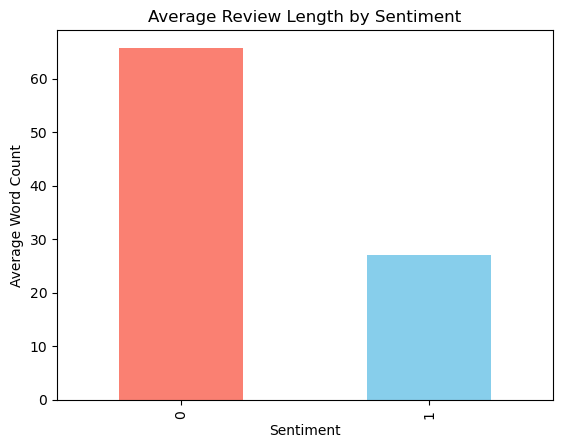

In [34]:
avg_length_sentiment.plot(kind='bar', color=['salmon', 'skyblue'])
plt.title('Average Review Length by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Average Word Count')

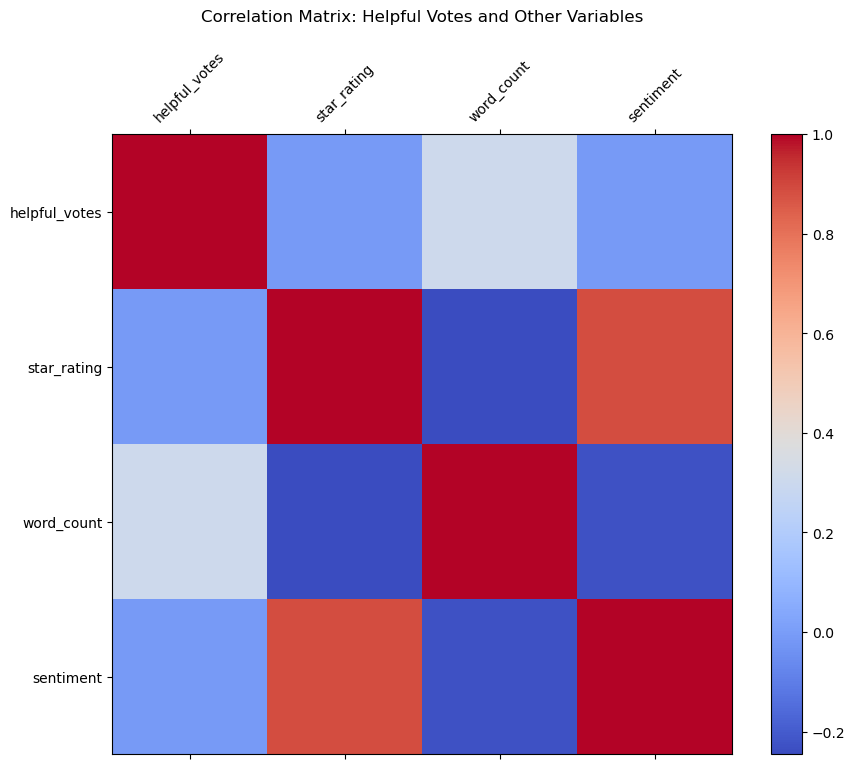

,helpful_votes,star_rating,word_count,sentiment
helpful_votes,1.000000,-0.011161,0.304493,-0.009823
star_rating,-0.011161,1.000000,-0.245388,0.885863
word_count,0.304493,-0.245388,1.000000,-0.229389
sentiment,-0.009823,0.885863,-0.229389,1.000000


In [39]:
# Calculate the correlation between helpful votes and other variables
correlation_matrix_helpful_votes = df[['helpful_votes', 'star_rating', 'word_count', 'sentiment']].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
plt.matshow(correlation_matrix_helpful_votes, fignum=1, cmap='coolwarm')
plt.colorbar()
plt.xticks(range(len(correlation_matrix_helpful_votes.columns)), correlation_matrix_helpful_votes.columns, rotation=45)
plt.yticks(range(len(correlation_matrix_helpful_votes.columns)), correlation_matrix_helpful_votes.columns)
plt.title('Correlation Matrix: Helpful Votes and Other Variables', pad=20)
plt.show()

correlation_matrix_helpful_votes


#### The strongest correlation observed is with the word count. Longer reviews are more likely to be found helpful, which makes sense as they generally contain more detailed and comprehensive information.

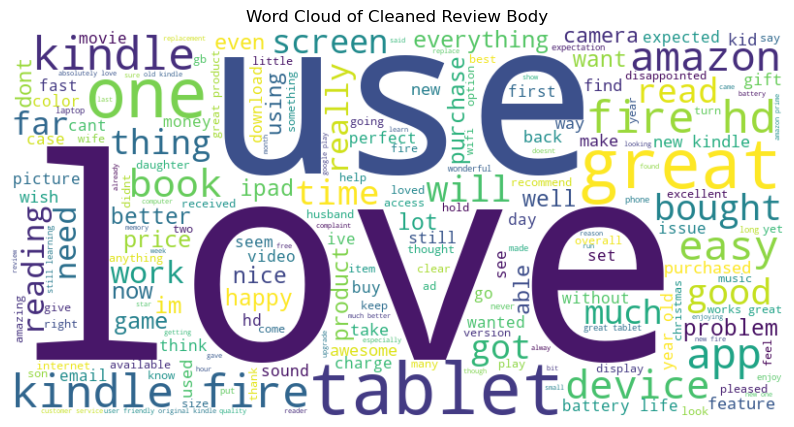

In [43]:
all_cleaned_text = ' '.join(df['cleaned_review_body'])
wordcloud_cleaned_review_body = WordCloud(width=800, height=400, background_color='white').generate(all_cleaned_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_cleaned_review_body, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Cleaned Review Body')
plt.show()


#### The word cloud reveals that most reviews are positive, focusing on the love for the product and its great features.